In [10]:
# import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import logging
import churn_library as cls

In [5]:
def import_data(pth):
    '''
    returns dataframe for the csv found at pth

    input:
            pth: a path to the csv
    output:
            df: pandas dataframe
    '''	
    df = pd.read_csv(pth)
    return df
    

def perform_eda(df):
    '''
    perform eda on df and save figures to images folder
    input:
            df: pandas dataframe

    output:
            None
    '''
    df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)
    plt.figure(figsize=(20,10)) 
    df['Churn'].hist()
    plt.savefig('./images/eda/Churn_histogram')
    

    plt.figure(figsize=(20,10)) 
    df['Customer_Age'].hist()
    plt.savefig('./images/eda/Customer_age_histogram')


    plt.figure(figsize=(20,10)) 
    df.Marital_Status.value_counts('normalize').plot(kind='bar')
    plt.savefig('./images/eda/marital_status_scatter')

    plt.figure(figsize=(20,10)) 
        # distplot is deprecated. Use histplot instead
        # sns.distplot(df['Total_Trans_Ct']);
        # Show distributions of 'Total_Trans_Ct' and add a smooth curve obtained using a kernel density estimate
    sns.histplot(df['Total_Trans_Ct'], stat='density', kde=True)
    plt.savefig('./images/eda/total_trans_histogram')


    plt.figure(figsize=(20,10)) 
    sns.heatmap(df.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
    plt.savefig('./images/eda/heatmap')


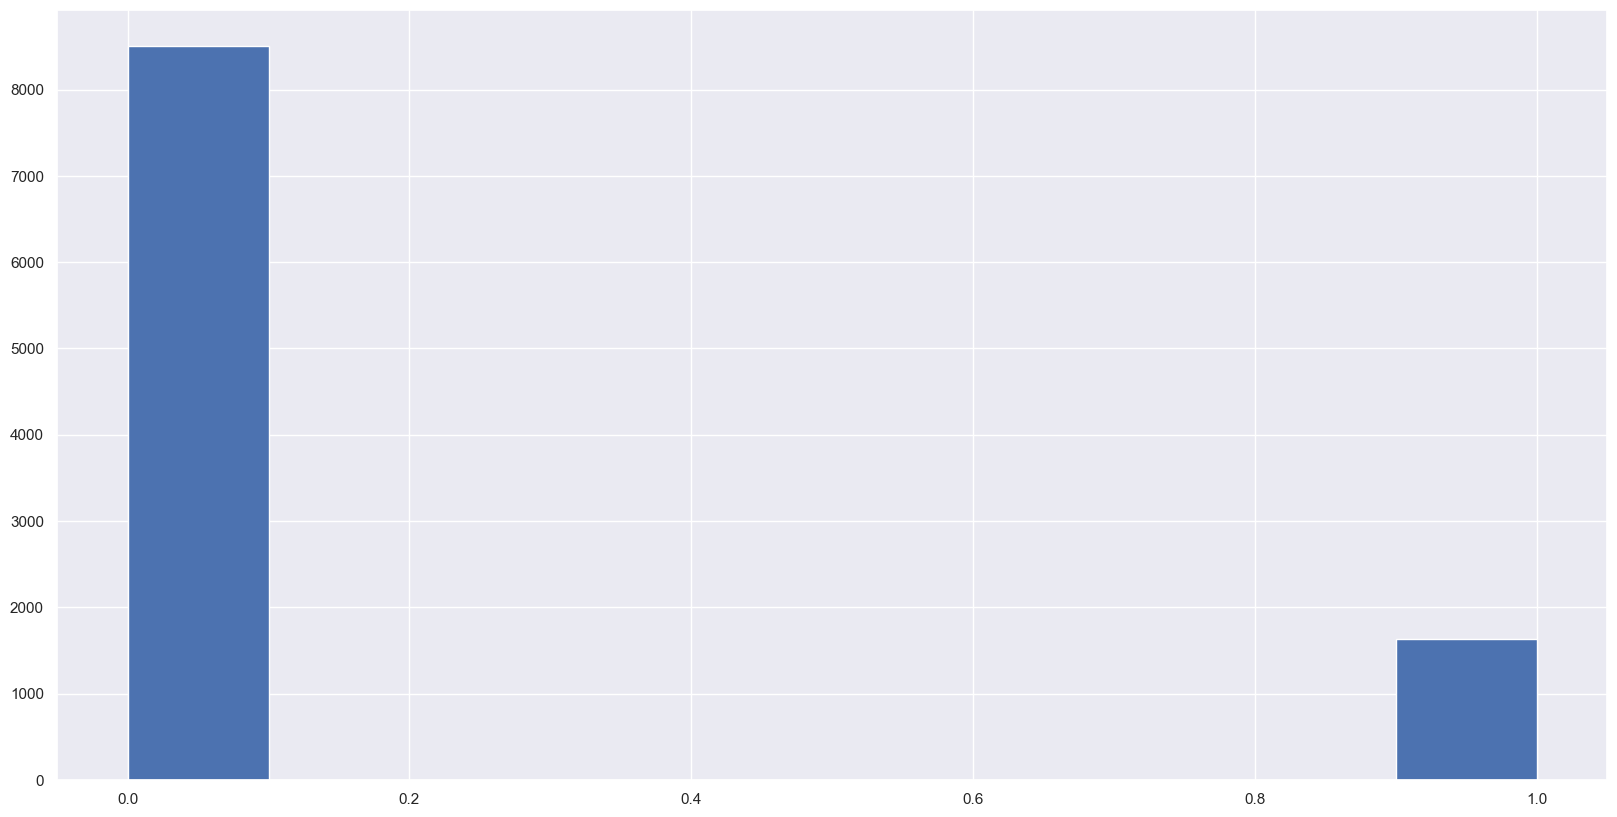

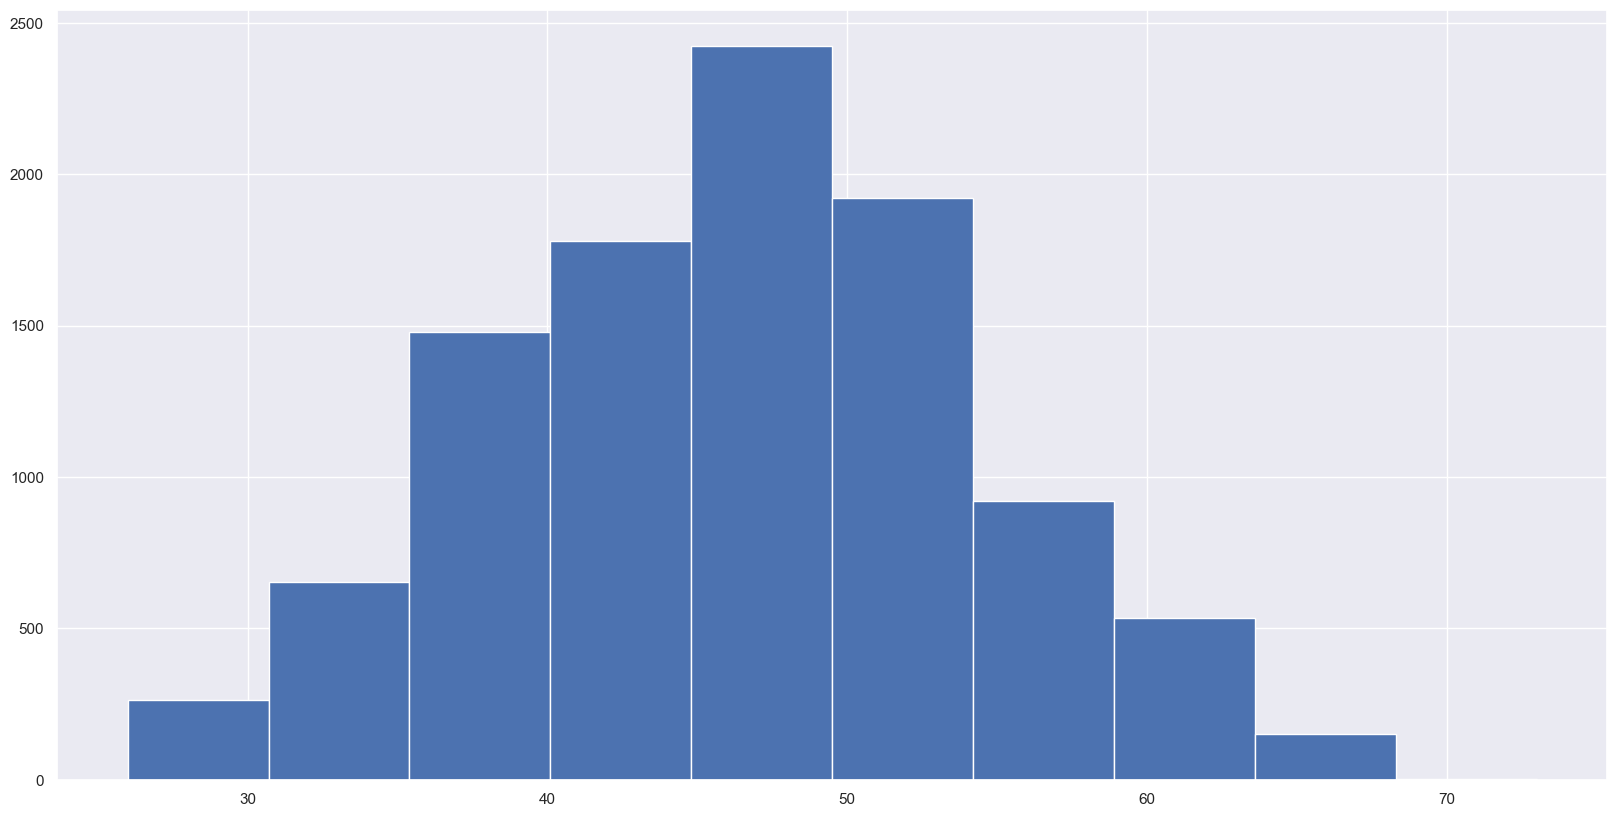

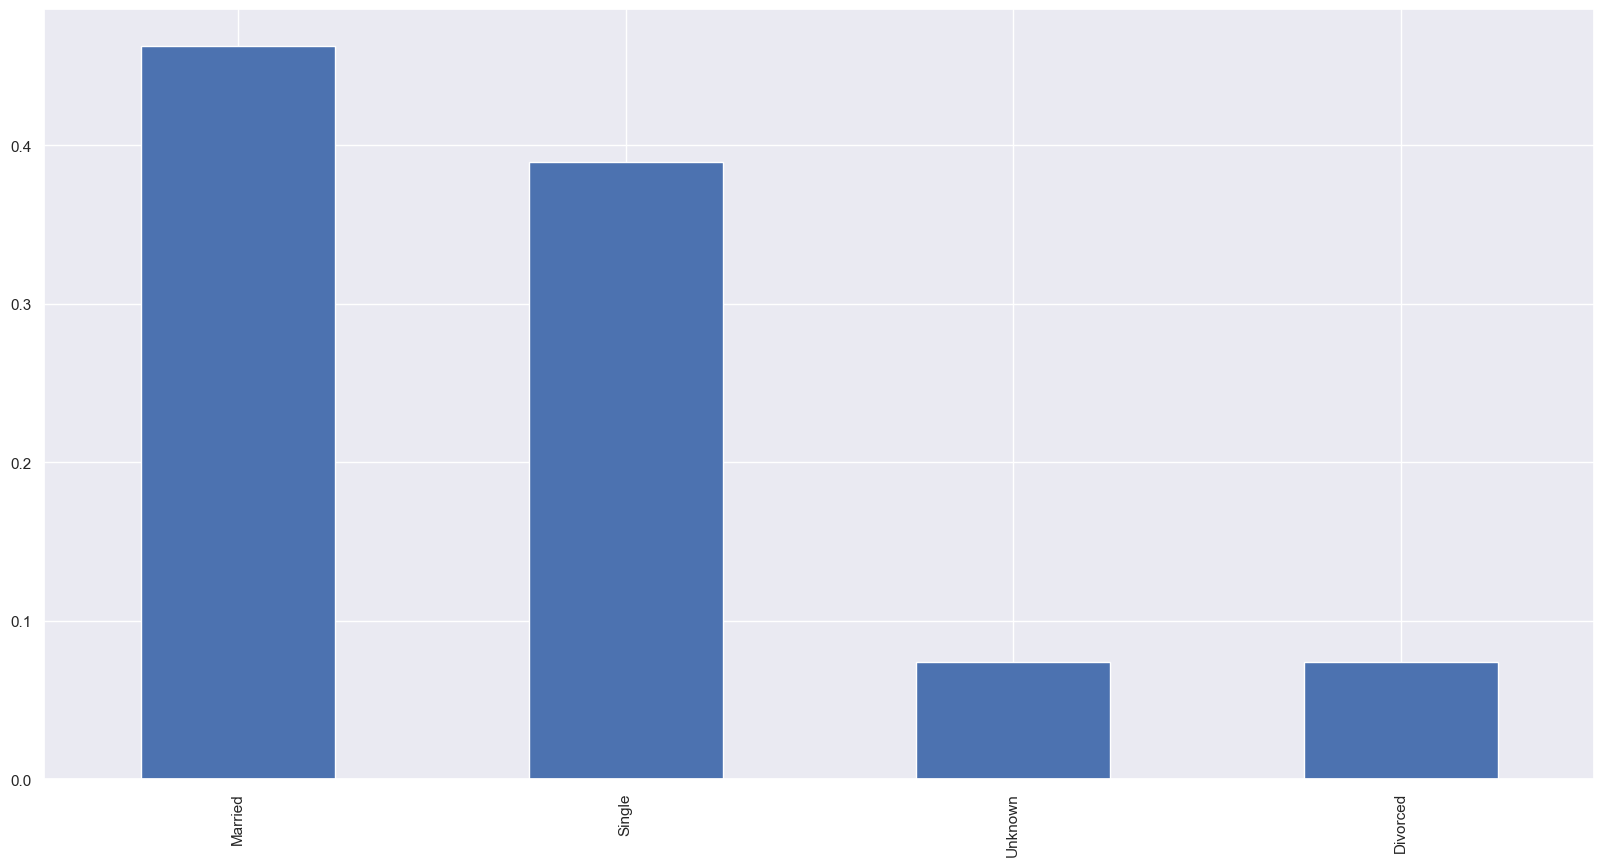

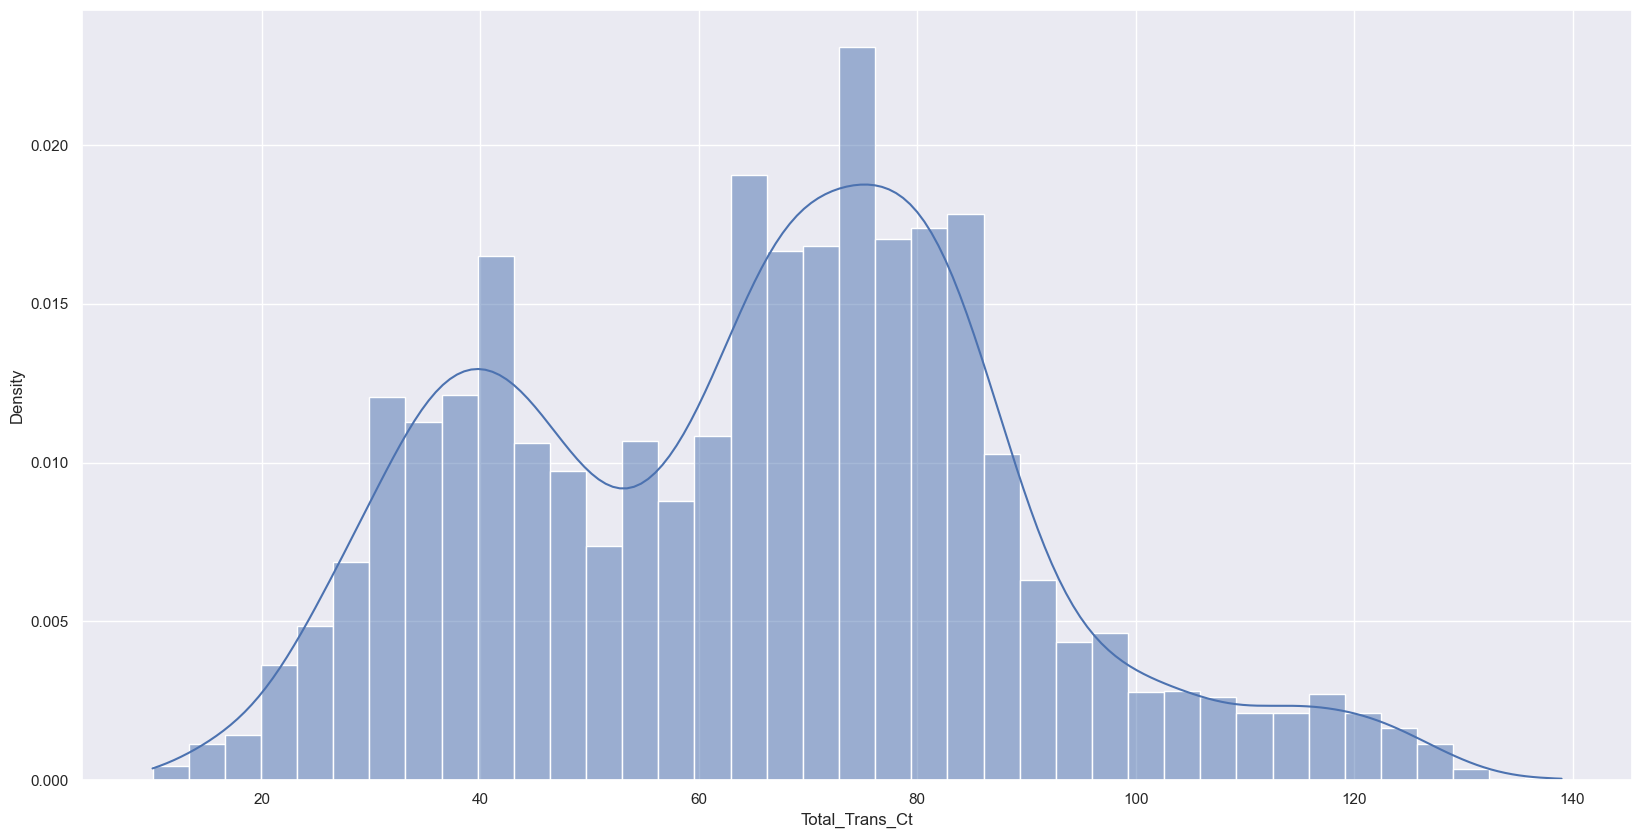

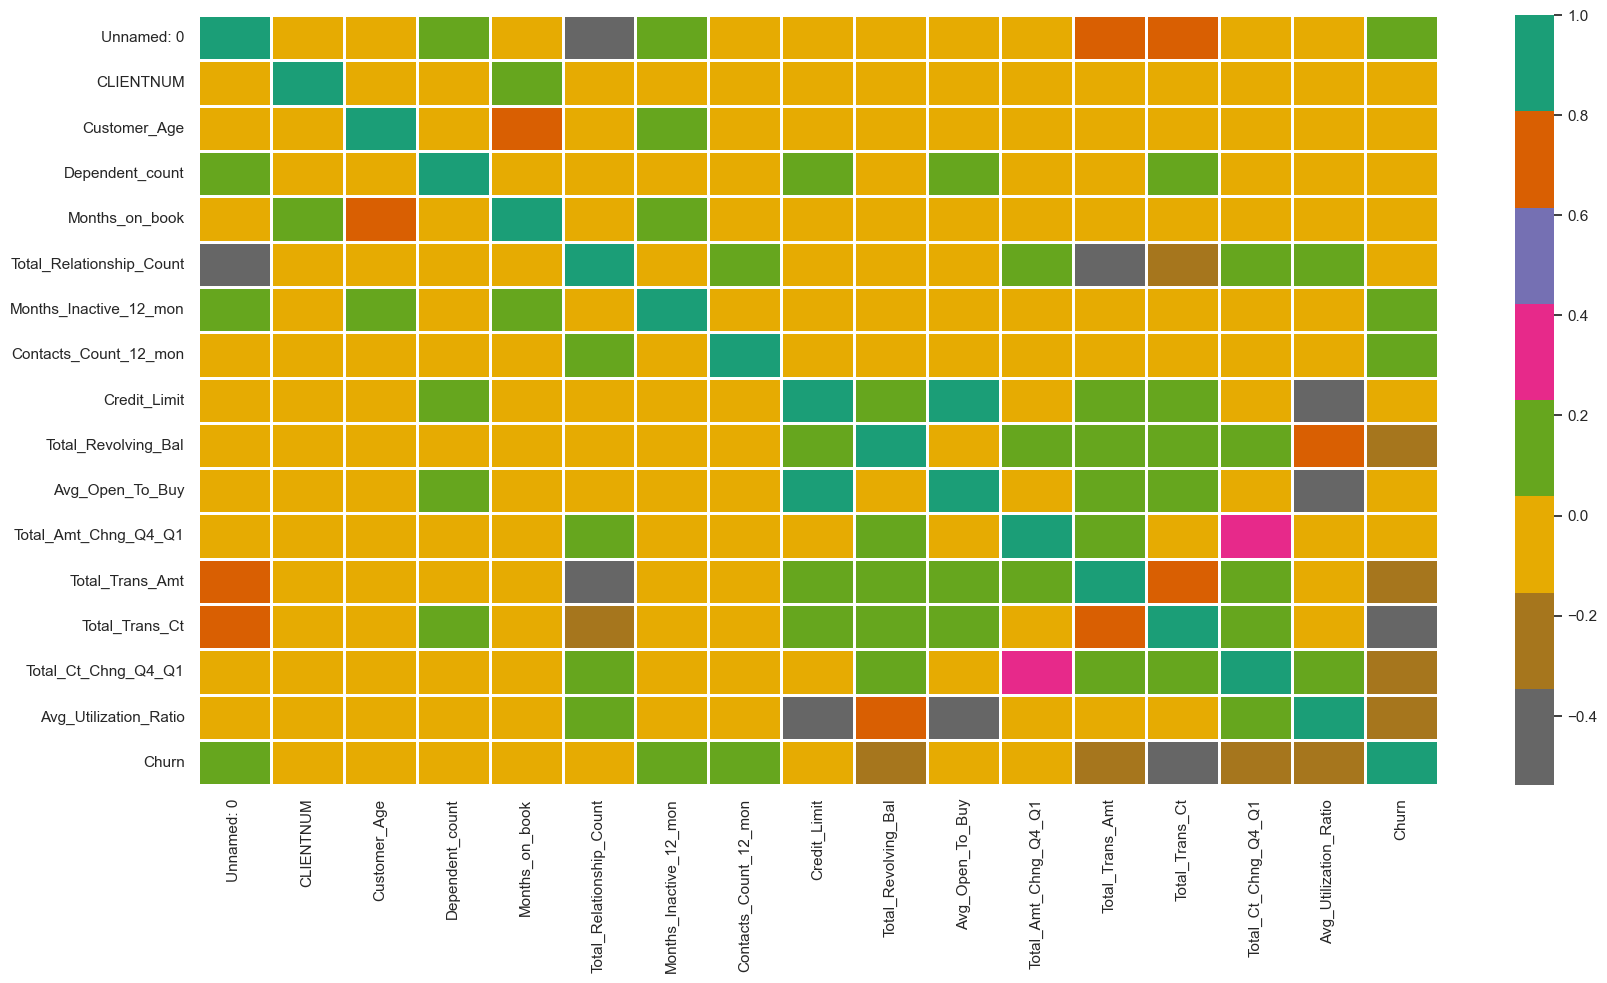

In [6]:
df = import_data("./data/bank_data.csv")
perform_eda(df)

# print(df.head(4))

In [ ]:
def encoder_helper(df, category_lst, y_field):
    '''
    helper function to turn each categorical column into a new column with
    propotion of churn for each category - associated with cell 15 from the notebook
    input:
            bank_df: pandas dataframe
            category_lst: list of columns that contain categorical features
            y_field: str column name of y data
    output:
            df: pandas dataframe with new columns for
    '''
    df[y_field] = df['Attrition_Flag'].apply(
        lambda val: 0 if val == "Existing Customer" else 1)

    for cat in category_lst:
        df[cat + '_' + y_field] = df[cat].map(df.groupby(cat).mean()[y_field])
    return df

In [7]:
TEST_DF = pd.DataFrame(
            {'Gender': ['F', 'M', 'M', 'F'], 'Attrition_Flag': [0, 1, 0, 0]})

In [8]:
TEST_DF

,Gender,Attrition_Flag
0,F,0
1,M,1
2,M,0
3,F,0


In [11]:
def test_encoder_helper(encoder_helper, test_df, category_lst, y_field):
    '''
    test encoder helper
    '''
    encoded_df = encoder_helper(test_df, category_lst, y_field)
    try:
        for cat in category_lst:
            assert encoded_df.groupby(cat).mean(
            )[cat + '_' + y_field].equals(test_df.groupby(cat).mean()[y_field])
        logging.info("Testing encoder_helper: SUCCESS")
    except AssertionError as err:
        logging.error("Testing encoder_helper: FAILED")
        raise err

In [13]:

# test_encoder_helper(cls.encoder_helper, TEST_DF, ['Gender'], 'Churn')
# result.append(True)
# print(TEST_DF)